In [231]:
import os
import numpy as np
import nibabel as nib
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [208]:
x_path = 'data/2/rp_im'
y_path = 'data/2/rp_msk'
l_path = 'data/2/rp_lung_msk'

In [209]:
for i in range(9):
    curr_x = nib.load(x_path + '/' + str(i+1) + '.nii').get_fdata()
    curr_y = nib.load(y_path + '/' + str(i+1) + '.nii').get_fdata()
    curr_l = nib.load(l_path + '/' + str(i+1) + '.nii').get_fdata()
    
    if i == 0:
        x = curr_x
        y = curr_y
        l = curr_l
    else:
        x = np.concatenate((x, curr_x), axis=2)
        y = np.concatenate((y, curr_y), axis=2)
        l = np.concatenate((l, curr_l), axis=2)

<h4>Data has already been preprocessed with <a href="https://medium.com/@hbjenssen/covid-19-radiology-data-collection-and-preparation-for-artificial-intelligence-4ecece97bb5b">these</a> steps, except for the resize</h4>

In [210]:
print(x.shape)
print(y.shape)
print(l.shape)

(630, 630, 829)
(630, 630, 829)
(630, 630, 829)


In [217]:
from skimage.transform import resize
num_of_imgs = np.size(x, axis=2)

resized_x = np.zeros((512, 512, 1, num_of_imgs))
resized_y = np.zeros((512, 512, 1, num_of_imgs))
resized_l = np.zeros((512, 512, 1, num_of_imgs))

all_data = [[x, resized_x], [y, resized_y], [l, resized_l]]

for data in all_data:
    for i in range(num_of_imgs):
        resized_img = resize(data[0][:, :, i], (512, 512), preserve_range=True)
        
        flipped_resized_img = np.fliplr(np.rot90(resized_img, k=3))

        data[1][:, :, :, i] = img_to_array(flipped_resized_img)
    

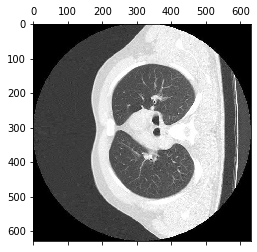

In [218]:
fig, ax = plt.subplots(1)
ax.matshow(x[:, :, 70], cmap='gray')

(512, 512, 1, 829)
(512, 512, 1)


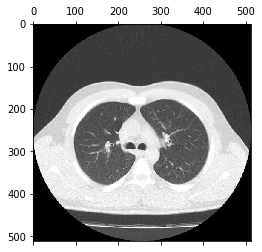

In [219]:
print(resized_x.shape)
print(resized_x[:, :, :, 70].shape)
fig, ax = plt.subplots(1)
ax.matshow(array_to_img(resized_x[:, :, :, 70]), cmap='gray')

In [228]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [229]:
test_imgs = resized_x[:, :, :, :5]
print(test_imgs.shape)

(512, 512, 1, 5)


In [230]:
i = 0
for batch in datagen.flow(test_imgs, batch_size=1,
                          save_to_dir='preview', save_format='png'):
    i += 1
    if i > 5:
        break 

ValueError: Unsupported channel number: 5